## Exercice 1 – Comparaison des filtres standards

<Figure size 1400x600 with 0 Axes>

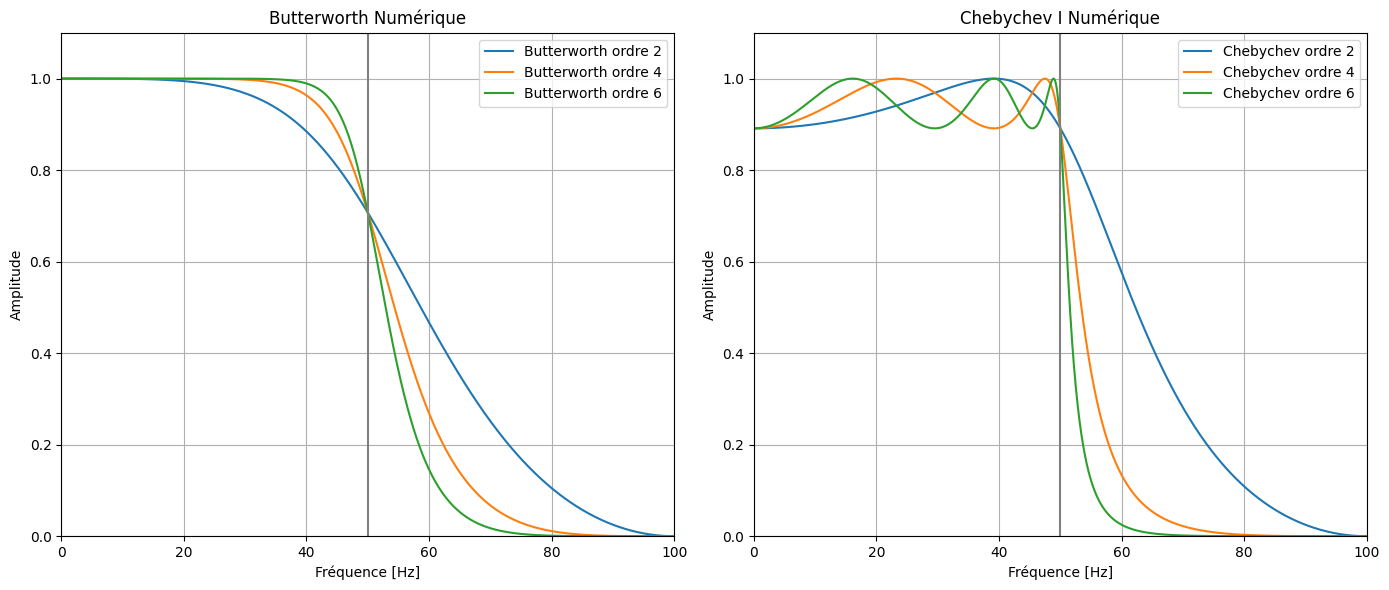

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, freqz
ordres = [2, 4, 6]
ondulation_db = 1
fc = 50 
fs = 200  

plt.figure(figsize=(14, 6))
plage_freq = np.linspace(0, 100, 2000)

plt.figure(figsize=(14, 6))

for ordre in ordres:
    b, a = butter(ordre, fc, fs=fs, btype='low')
    w, h = freqz(b, a, worN=plage_freq, fs=fs)
    plt.subplot(1, 2, 1)
    plt.plot(w, abs(h), label=f'Butterworth ordre {ordre}')
plt.axvline(x=50, color='grey', linestyle='-')

for ordre in ordres:
    b, a = cheby1(ordre, ondulation_db, fc, fs=fs, btype='low')
    w, h = freqz(b, a, worN=plage_freq, fs=fs)
    plt.subplot(1, 2, 2)
    plt.plot(w, abs(h), label=f'Chebychev ordre {ordre}')
plt.axvline(x=50, color='grey', linestyle='-') # pour indiquer la fréquence à laquelle le filtre commence à atténuer le signal.

plt.subplot(1, 2, 1)
plt.title('Butterworth Numérique')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 1.1)

plt.subplot(1, 2, 2)
plt.title('Chebychev I Numérique')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()


## Exercice 2 – Application d'un filtre de Butterworth sur un signal

### 1) Traçons le signal x(t) sur l'intervalle de temps [0,1]

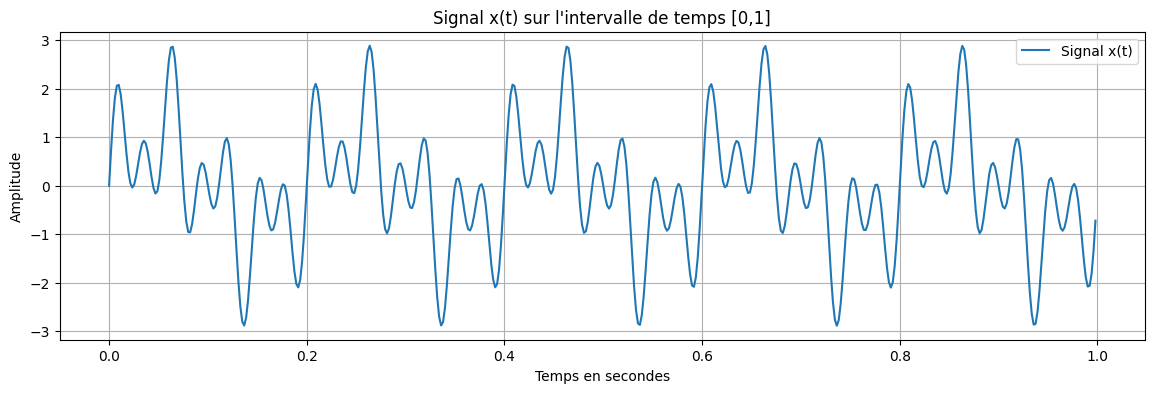

In [17]:
from scipy.signal import sosfilt

f1, f2, f3 = 5, 20, 35 # en Hz
Fe = 512 
t = np.linspace(0, 1, Fe, endpoint=False)

x_t = np.sin(2 * np.pi *f1 *t) + np.sin(2 * np.pi *f2 *t) + np.sin(2 * np.pi *f3 *t)

plt.figure(figsize=(14,4))
plt.plot(t, x_t, label="Signal x(t)")
plt.title("Signal x(t) sur l'intervalle de temps [0,1]")
plt.xlabel("Temps en secondes")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

### 2)  Affichons le spectre du signal x(t) entre −Fe/2 et Fe/2 puis entre −40 et 40

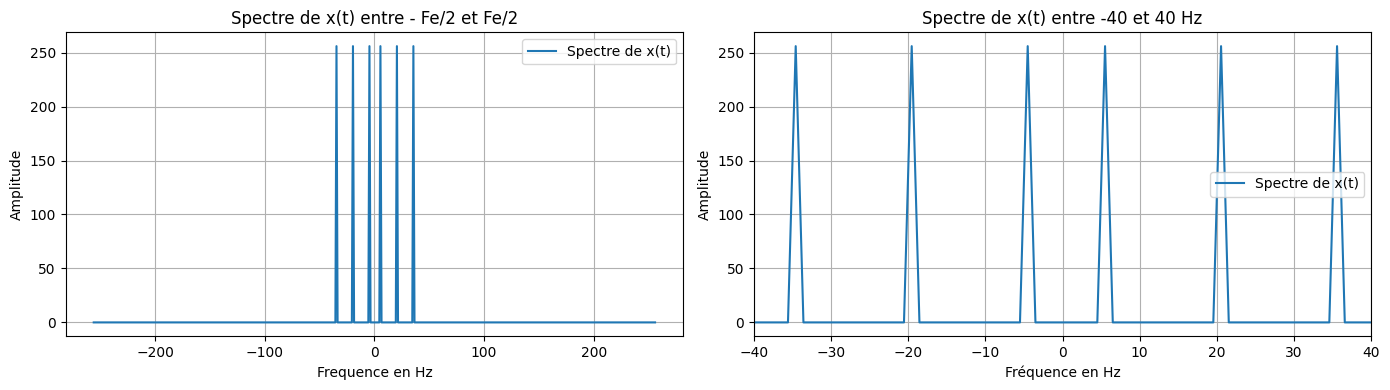

In [20]:
from scipy.fft import fft, fftshift

X_f = fft(x_t)
X_f_shifted = fftshift(X_f)
frequences = np.linspace(-Fe/2, Fe/2, len(X_f_shifted)) # pour l'axe des fréquences

plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.plot(frequences, abs(X_f_shifted), label="Spectre de x(t)")
plt.title("Spectre de x(t) entre - Fe/2 et Fe/2")
plt.xlabel("Frequence en Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(frequences, abs(X_f_shifted), label="Spectre de x(t)")
plt.title("Spectre de x(t) entre -40 et 40 Hz")
plt.xlim(-40, 40)
plt.xlabel("Fréquence en Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### 3) Pour éliminer f2 on choisit un filtre passe-bas de Butterworth avec une fréquence de coupure juste en dessous de f2 et un passe-haut avec une fréquence de coupure juste au-dessus de f2.

### 4 et 5) Filtre de Butterworth

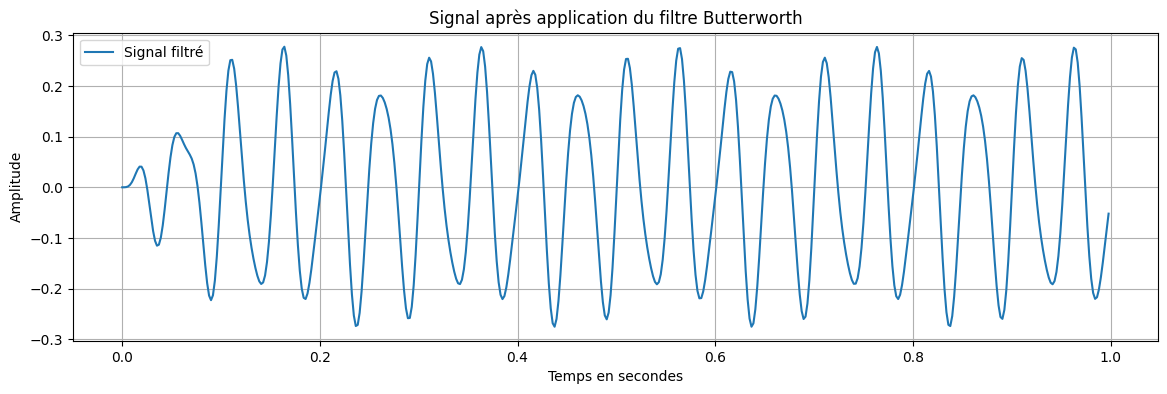

In [27]:
filtre_ordre = 4
fc_bas = 17
fc_haut = 23

# mes filtres qui me serviront à filtrer mon signal 
sos_passe_bas = butter(filtre_ordre, fc_bas, 'low', fs=Fe, output='sos')
sos_passe_haut = butter(filtre_ordre, fc_haut, 'high', fs=Fe, output='sos')

signal_filtre = sosfilt(sos_passe_bas, x_t)
signal_filtre = sosfilt(sos_passe_haut, signal_filtre)

plt.figure(figsize=(14, 4))
plt.plot(t, signal_filtre, label="Signal filtré")
plt.title("Signal après application du filtre Butterworth")
plt.xlabel("Temps en secondes")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

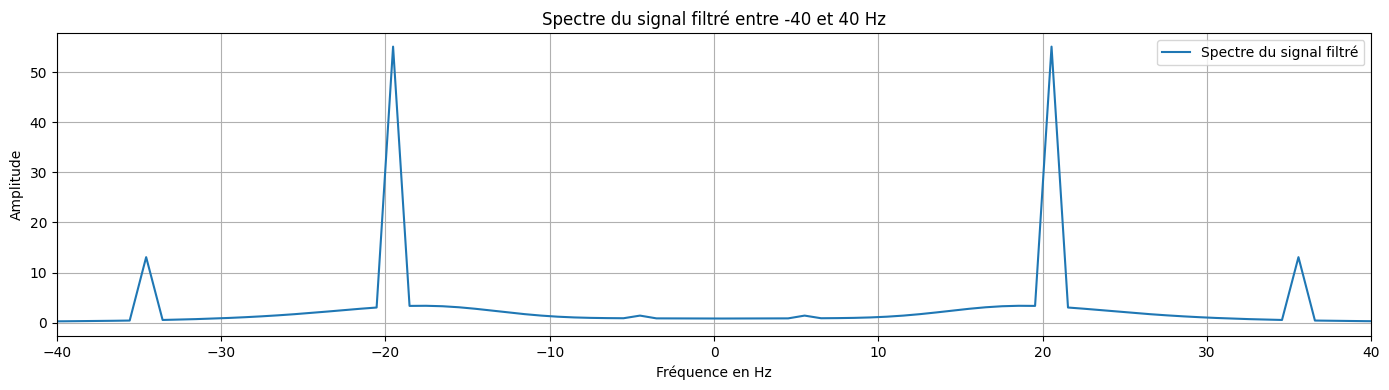

In [24]:
X_f_filtre = fft(signal_filtre)
X_f_filtre_shifted = fftshift(X_f_filtre)

plt.figure(figsize=(14, 4))
plt.plot(frequences, abs(X_f_filtre_shifted), label="Spectre du signal filtré")
plt.title("Spectre du signal filtré entre -40 et 40 Hz")
plt.xlim(-40, 40)
plt.xlabel("Fréquence en Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### 6) Mesurons l’erreur entre le signal attendu et le signal obtenu

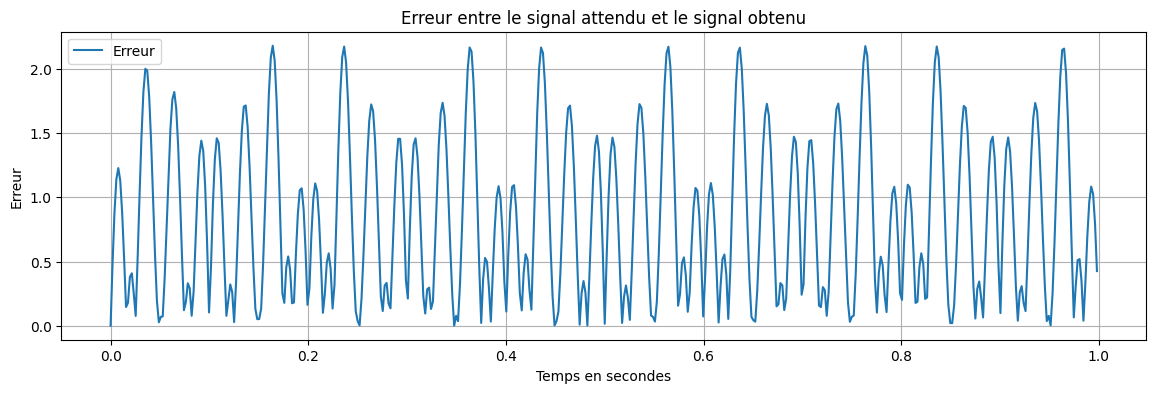

In [29]:
signal_attendu = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f3 * t)
erreur = np.abs(signal_attendu - signal_filtre)
plt.figure(figsize=(14, 4))
plt.plot(t, erreur, label="Erreur")
plt.title("Erreur entre le signal attendu et le signal obtenu")
plt.xlabel("Temps en secondes")
plt.ylabel("Erreur")
plt.grid()
plt.legend()
plt.show()

In [32]:
erreur_moyenne = np.mean(erreur)
erreur_max = np.max(erreur)
erreur_moyenne, erreur_max

(0.8374454949235037, 2.1805518148981453)